In [ ]:
%cd /content/drive/MyDrive/MCUT/R911R912
!ls

/content/drive/MyDrive/MCUT/R911R912
20220413		code	     test.csv
ARO1_pearsonr_corr.csv	data	     Untitled0.ipynb
ARO1特徵因子分析.ipynb	dataset.pkl  Untitled1.ipynb
ARO2_pearsonr_corr.csv	model
ARO2特徵因子分析.ipynb	PPT


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [ ]:
df_X = pd.read_excel("data/ADS47/R911R912 _明志蔡教授_R4-ARO2.xlsx", sheet_name = "R911R912_TAG相關錶點資料(X)")
df_y = pd.read_excel("data/ADS47/R911R912 _明志蔡教授_R4-ARO2.xlsx", sheet_name = "目標值(Y)相關錶點資料")

In [ ]:
df_x = df_X.join(df_y["ARO2-LIMS-s922@MX"])

In [ ]:
df_x["Unnamed: 0"] = range(len(df_x["Unnamed: 0"]))
df_x["ARO2-DCS-FI91601"] = pd.to_numeric(df_x["ARO2-DCS-FI91601"], errors='coerce')
df_x = df_x.loc[df_x["ARO2-DCS-FI91601"] > 520, :]
df_x.reset_index(inplace = True, drop = True)

In [ ]:
df = df_x[["Unnamed: 0", "ARO2-LIMS-s922@MX", "ARO2-DCS-FI91601", "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9", "ARO2-LIMS-S708@A10+",
           "ARO2-LIMS-S708@Water", "ARO2-LIMS-S708@Sulfur", "ARO2-LIMS-s919@A9", "ARO2-LIMS-s919@A10+",
           "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water", "ARO2-DCS-R911_2_A_FA", "ARO2-DCS-R911_2_L2_A"]]
df["Unnamed: 0"] = range(len(df["Unnamed: 0"]))
df.loc[df["ARO2-LIMS-S905@Water"] == "Over Range", "ARO2-LIMS-S905@Water"] = np.nan
df.loc[df["ARO2-LIMS-S907@Water"] == "Over Range", "ARO2-LIMS-S907@Water"] = np.nan
# df = df[df["ARO2-LIMS-S905@Water"].notnull() & df["ARO2-LIMS-S907@Water"].notnull()]
# df.columns.values[0] = "time(hr)"
from tqdm import tqdm
for i in tqdm(df.columns):
    df[i] = pd.to_numeric(df[i], errors='coerce')

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
  0%|          | 0/14 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Unnamed: 0,ARO2-LIMS-s922@MX,ARO2-DCS-FI91601,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-LIMS-s919@A9,ARO2-LIMS-s919@A10+,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_L2_A
0,0,NaN,520.227295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476,0.354005
1,1,NaN,520.065247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476,0.354005
2,2,NaN,520.485046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476,0.354005
3,3,NaN,520.381592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476,0.356976
4,4,NaN,522.027710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476,0.358866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40248,40248,NaN,544.754517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502,0.372907
40249,40249,NaN,545.488342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502,0.372907
40250,40250,NaN,541.041016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502,0.372907
40251,40251,NaN,547.967651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502,0.372907


In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(test_df)
missing_values

Your selected dataframe has 15 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
ARO2-LIMS-S907@Water,1146,69.2
ARO2-LIMS-S905@Water,1145,69.1
ARO2-LIMS-S708@Sulfur,1138,68.7
ARO2-LIMS-s919@A9,1138,68.7
ARO2-LIMS-s919@A10+,1137,68.6
ARO2-LIMS-S708@Br.Index,1132,68.3
ARO2-LIMS-S708@Water,121,7.3
ARO2-LIMS-S708@A10+,102,6.2
ARO2-LIMS-S708@A9,76,4.6


In [ ]:
from sklearn.impute import KNNImputer 
 
imputer = KNNImputer(n_neighbors=3) 
imputed = imputer.fit_transform(df[["Unnamed: 0", "ARO2-DCS-FI91601", "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9", "ARO2-LIMS-S708@A10+",
           "ARO2-LIMS-S708@Water", "ARO2-LIMS-S708@Sulfur", "ARO2-LIMS-s919@A9", "ARO2-LIMS-s919@A10+",
           "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water", "ARO2-DCS-R911_2_A_FA", "ARO2-DCS-R911_2_L2_A"]]) 
df_imputed = pd.DataFrame(imputed, columns=["Unnamed: 0", "ARO2-DCS-FI91601", "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9", "ARO2-LIMS-S708@A10+",
           "ARO2-LIMS-S708@Water", "ARO2-LIMS-S708@Sulfur", "ARO2-LIMS-s919@A9", "ARO2-LIMS-s919@A10+",
           "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water", "ARO2-DCS-R911_2_A_FA", "ARO2-DCS-R911_2_L2_A"])
df_imputed

In [ ]:
df = df_imputed.join(df["ARO2-LIMS-s922@MX"])

In [ ]:
for i in range(len(df)-1):
  df.loc[i+8, "btw_t"] = df["Unnamed: 0"][i+8] - df["Unnamed: 0"][i]
  df.loc[i+8, "btw_ARO2-LIMS-s922@MX"] = df["ARO2-LIMS-s922@MX"][i+8] - df["ARO2-LIMS-s922@MX"][i]

df

In [ ]:
# ["Unnamed: 0", "ARO2-LIMS-s922@MX", "ARO2-DCS-FI91601", "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9", "ARO2-LIMS-S708@A10+",
#            "ARO2-LIMS-S708@Water", "ARO2-LIMS-S708@Sulfur", "ARO2-LIMS-s919@A9", "ARO2-LIMS-s919@A10+",
#            "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water", "ARO2-DCS-R911_2_A_FA", "ARO2-DCS-R911_2_L2_A"]]
test_df = df.loc[df["btw_ARO2-LIMS-s922@MX"] > 0, ["btw_ARO2-LIMS-s922@MX", "btw_t", "ARO2-DCS-FI91601", "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9", "ARO2-LIMS-S708@A10+",
           "ARO2-LIMS-S708@Water", "ARO2-LIMS-S708@Sulfur", "ARO2-LIMS-s919@A9", "ARO2-LIMS-s919@A10+",
           "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water", "ARO2-DCS-R911_2_A_FA", "ARO2-DCS-R911_2_L2_A"]].reset_index()
# test_df['ARO2-DCS-FI91601'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-S708@Br.Index'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-S708@A9'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-S708@A10+'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-S708@Water'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-S708@Sulfur'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-s919@A9'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-s919@A10+'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-S905@Water'].fillna(method='ffill', inplace=True)
# test_df['ARO2-LIMS-S907@Water'].fillna(method='ffill', inplace=True)
# test_df['ARO2-DCS-R911_2_A_FA'].fillna(method='ffill', inplace=True)
# test_df['ARO2-DCS-R911_2_L2_A'].fillna(method='ffill', inplace=True)
# test_df['ARO2-DCS-FI91601'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-S708@Br.Index'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-S708@A9'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-S708@A10+'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-S708@Water'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-S708@Sulfur'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-s919@A9'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-s919@A10+'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-S905@Water'].fillna(method='bfill', inplace=True)
# test_df['ARO2-LIMS-S907@Water'].fillna(method='bfill', inplace=True)
# test_df['ARO2-DCS-R911_2_A_FA'].fillna(method='bfill', inplace=True)
# test_df['ARO2-DCS-R911_2_L2_A'].fillna(method='bfill', inplace=True)

In [ ]:
N = 0
for i in range(len(test_df)):
  if test_df["index"][i+1] == test_df["index"][i]+8:
    N = N + 1
  else:
    N = N + 1
    test_df.loc[i+1-N, "time"] = N
    test_df.loc[i+1-N, "sum_ARO2-LIMS-s922@MX"] = test_df.loc[i+1-N:i, "btw_ARO2-LIMS-s922@MX"].sum()
    N = 0

In [ ]:
# ["Unnamed: 0", "ARO2-LIMS-s922@MX", "ARO2-DCS-FI91601", "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9", "ARO2-LIMS-S708@A10+",
#            "ARO2-LIMS-S708@Water", "ARO2-LIMS-S708@Sulfur", "ARO2-LIMS-s919@A9", "ARO2-LIMS-s919@A10+",
#            "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water", "ARO2-DCS-R911_2_A_FA", "ARO2-DCS-R911_2_L2_A"]]


row = test_df[test_df["time"].notnull()].index.tolist()
for i in range(len(row)):
  test_df.loc[row[i], "mean_ARO2-DCS-FI91601"] = test_df.loc[row[i]:row[i+1], "ARO2-DCS-FI91601"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-S708@Br.Index"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-S708@Br.Index"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-S708@A9"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-S708@A9"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-S708@A10+"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-S708@A10+"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-S708@Water"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-S708@Water"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-S708@Sulfur"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-S708@Sulfur"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-s919@A9"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-s919@A9"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-s919@A10+"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-s919@A10+"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-S905@Water"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-S905@Water"].mean()
  test_df.loc[row[i], "mean_ARO2-LIMS-S907@Water"] = test_df.loc[row[i]:row[i+1], "ARO2-LIMS-S907@Water"].mean()
  test_df.loc[row[i], "mean_ARO2-DCS-R911_2_A_FA"] = test_df.loc[row[i]:row[i+1], "ARO2-DCS-R911_2_A_FA"].mean()
  test_df.loc[row[i], "mean_ARO2-DCS-R911_2_L2_A"] = test_df.loc[row[i]:row[i+1], "ARO2-DCS-R911_2_L2_A"].mean()

In [ ]:
test = test_df.loc[test_df["sum_ARO2-LIMS-s922@MX"] < 200]

In [ ]:
liner_df = test[test["time"].notnull()]
liner_df["time"] = liner_df["time"] * 8
liner_df = liner_df.dropna()

In [ ]:
# importing train_test_split from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(liner_df[["time", "mean_ARO2-DCS-FI91601", "mean_ARO2-LIMS-S708@Br.Index", "mean_ARO2-LIMS-S708@A9", "mean_ARO2-LIMS-S708@A10+", 
                                                              "mean_ARO2-LIMS-S708@Water", "mean_ARO2-LIMS-S708@Sulfur", "mean_ARO2-LIMS-s919@A9", "mean_ARO2-LIMS-s919@A10+",
                                                              "mean_ARO2-LIMS-S905@Water", "mean_ARO2-LIMS-S907@Water", "mean_ARO2-DCS-R911_2_A_FA", "mean_ARO2-DCS-R911_2_L2_A"]], liner_df["sum_ARO2-LIMS-s922@MX"], test_size = 0.2, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(liner_df[["time", "mean_ARO2-DCS-FI91601"]], liner_df["mean_ARO2-DCS-PDI91101"], test_size = 0.2, random_state = 42)


LR = LinearRegression()
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test, y_prediction)
print("r2 socre:",score)
print("mean_sqrd_error:",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error:",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre: 0.1534258330550805
mean_sqrd_error: 280.42227502176354
root_mean_squared error: 16.745813656605748


In [ ]:
print("Model slope:    ", LR.coef_)
print("Model intercept:", LR.intercept_)

Model slope:     [ 1.11633010e+00 -1.88227978e-01  5.52349541e-02 -1.83166023e+02
 -8.35964278e+02  9.28512108e-02  8.71219458e+00  5.80380862e-03
  5.84738333e-03 -1.15160676e-01  1.05402020e-01 -4.78245806e-01
  8.37377101e+01]
Model intercept: 50.88941920002381


In [ ]:
""" 
R911 = 0.00020522 * time + -0.00100263 * mean_ARO2-DCS-FI91601 + 0.00033328 * mean_ARO2-LIMS-S905@Water 
     + 0.00058329 * mean_ARO2-LIMS-S907@Water + 0.5846349992679343
"""

' \nR911 = 0.00020522 * time + -0.00100263 * mean_ARO2-DCS-FI91601 + 0.00033328 * mean_ARO2-LIMS-S905@Water \n     + 0.00058329 * mean_ARO2-LIMS-S907@Water + 0.5846349992679343\n'

Lasso

In [ ]:
# importing train_test_split from sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(liner_df[["time", "mean_ARO2-DCS-FI91601", "mean_ARO2-LIMS-S708@Br.Index", "mean_ARO2-LIMS-S708@A9", "mean_ARO2-LIMS-S708@A10+", 
                                                              "mean_ARO2-LIMS-S708@Water", "mean_ARO2-LIMS-S708@Sulfur", "mean_ARO2-LIMS-s919@A9", "mean_ARO2-LIMS-s919@A10+",
                                                              "mean_ARO2-LIMS-S905@Water", "mean_ARO2-LIMS-S907@Water", "mean_ARO2-DCS-R911_2_A_FA", "mean_ARO2-DCS-R911_2_L2_A"]], liner_df["sum_ARO2-LIMS-s922@MX"], test_size = 0.2, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(liner_df[["time", "mean_ARO2-DCS-FI91601"]], liner_df["mean_ARO2-DCS-PDI91101"], test_size = 0.2, random_state = 42)

clf_lasso = linear_model.Lasso(alpha=0.1)
clf_lasso.fit(x_train,y_train)
y_prediction =  clf_lasso.predict(x_test)

In [ ]:
# predicting the accuracy score
score=r2_score(y_test, y_prediction)
print("r2 socre:",score)
print("mean_sqrd_error:",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error:",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre: 0.14520729628404427
mean_sqrd_error: 283.14461273140677
root_mean_squared error: 16.826901459609452


In [ ]:
print("Model slope:    ", clf_lasso.coef_)
print("Model intercept:", clf_lasso.intercept_)

Model slope:     [ 1.10799054 -0.19620145  0.05644725 -0.         -0.          0.08574915
  0.          0.00572726  0.00331145 -0.13105218  0.08853331  0.
  0.        ]
Model intercept: 97.88612806898132


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(liner_df[["time", "mean_ARO2-DCS-FI91601", "mean_ARO2-LIMS-S708@Br.Index", "mean_ARO2-LIMS-S708@A9", "mean_ARO2-LIMS-S708@A10+", 
                                  "mean_ARO2-LIMS-S708@Water", "mean_ARO2-LIMS-S708@Sulfur", "mean_ARO2-LIMS-s919@A9", "mean_ARO2-LIMS-s919@A10+",
                                  "mean_ARO2-LIMS-S905@Water", "mean_ARO2-LIMS-S907@Water", "mean_ARO2-DCS-R911_2_A_FA", "mean_ARO2-DCS-R911_2_L2_A"]], liner_df["sum_ARO2-LIMS-s922@MX"], test_size = 0.2, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(liner_df[["time", "mean_ARO2-DCS-FI91601"]], liner_df["mean_ARO2-DCS-PDI91101"], test_size = 0.2, random_state = 42)

model = make_pipeline(PolynomialFeatures(1),linear_model.LinearRegression())
model.fit(x_train,y_train)
y_prediction = model.predict(x_test)

In [ ]:
# predicting the accuracy score
score = r2_score(y_test, y_prediction)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.15342583305504154
mean_sqrd_error is== 280.42227502177644
root_mean_squared error of is== 16.74581365660613


In [ ]:
print("Model degree:    ", model.steps[0][1])
print("Model slope:    ", model.steps[1][1].coef_)
print("Model intercept:", model.steps[1][1].intercept_)

Model degree:     PolynomialFeatures(degree=1)
Model slope:     [ 0.00000000e+00  1.11633010e+00 -1.88227978e-01  5.52349541e-02
 -1.83166023e+02 -8.35964278e+02  9.28512108e-02  8.71219458e+00
  5.80380862e-03  5.84738333e-03 -1.15160676e-01  1.05402020e-01
 -4.78245806e-01  8.37377101e+01]
Model intercept: 50.889419199939354


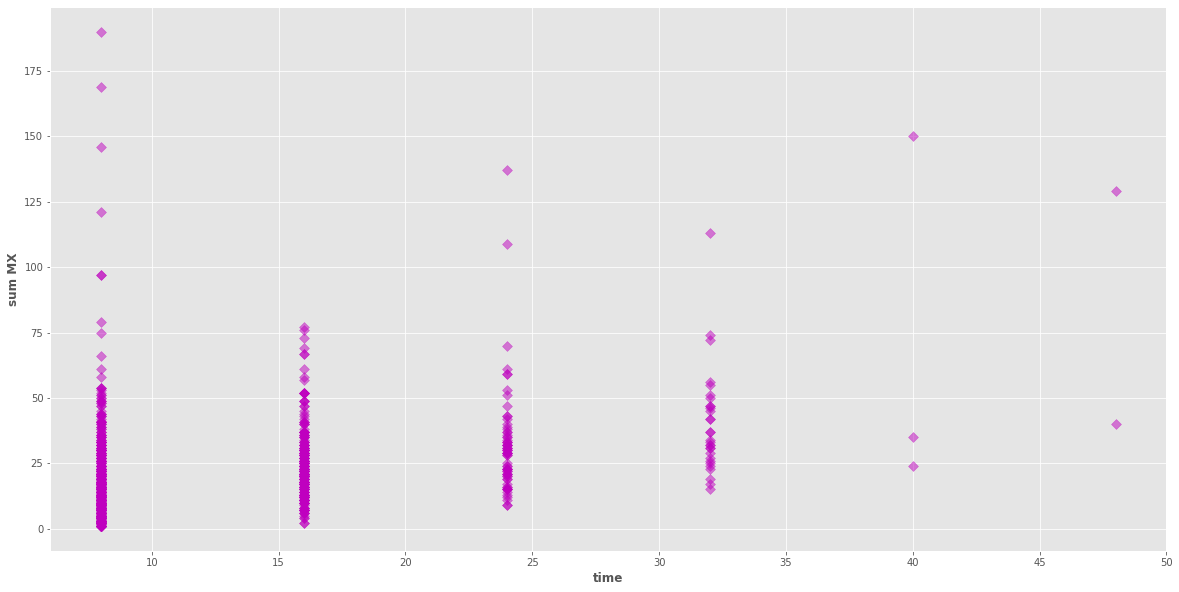

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))   # 顯示圖框架大小

plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.xlabel("time", fontweight = "bold")                  #設定x座標標題及粗體
plt.ylabel("sum MX", fontweight = "bold")   #設定y座標標題及粗體=

plt.scatter(liner_df["time"],                    # x軸資料
      liner_df["sum_ARO2-LIMS-s922@MX"],     # y軸資料
      c = "m",                                  # 點顏色
      s = 50,                                   # 點大小
      alpha = .5,                               # 透明度
      marker = "D")                             # 點樣式